In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
!unzip '/content/drive/MyDrive/499/mental-state.csv'

Archive:  /content/drive/MyDrive/Training/498R/Eman/mental-state.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drive/MyDrive/Training/498R/Eman/mental-state.csv or
        /content/drive/MyDrive/Training/498R/Eman/mental-state.csv.zip, and cannot find /content/drive/MyDrive/Training/498R/Eman/mental-state.csv.ZIP, period.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Training/498R/Eman/mental-state.csv")

In [ ]:
df

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,15.762328,19.113555,23.696867,7.568395,-6.503336,6.867187,-11.955396,-16.519912,19.838319,14.333094,...,0.008537,0.008941,0.004102,0.003156,0.003659,0.010179,0.004591,0.013817,0.004536,0.0
2475,34.675582,34.200645,-57.624820,-4.825609,7.382353,2.324416,-1.341208,-4.178625,26.383597,28.782987,...,0.003324,0.003593,0.001702,0.003121,0.002686,0.001645,0.001770,0.001038,0.001973,2.0
2476,29.813809,29.623031,-86.503988,7.532121,-19.581287,-0.628400,133.947160,-2.049096,45.484851,32.163999,...,0.000754,0.000508,0.000263,0.000701,0.000797,0.001096,0.000388,0.000529,0.001079,2.0
2477,59.453973,17.944332,-10.164238,42.568211,-1.300655,-19.993690,-54.331696,12.947622,55.203380,40.228490,...,0.003332,0.003557,0.004063,0.001662,0.002665,0.002353,0.003976,0.001660,0.003229,2.0


In [ ]:
df.shape

(2479, 989)

In [ ]:
df['Label'].value_counts()

2.0    830
1.0    830
0.0    819
Name: Label, dtype: int64

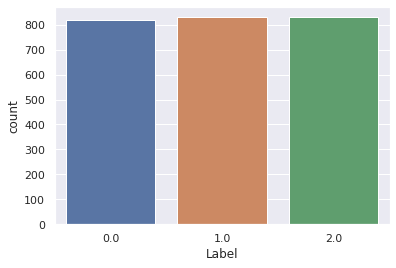

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Label", data=df)

In [ ]:
df.isnull()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isna().sum()

lag1_mean_0           0
lag1_mean_1           0
lag1_mean_2           0
lag1_mean_3           0
lag1_mean_d_h2h1_0    0
                     ..
freq_720_3            0
freq_730_3            0
freq_740_3            0
freq_750_3            0
Label                 0
Length: 989, dtype: int64

In [ ]:
df.describe()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,...,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,23.584351,27.060411,20.452931,11.526044,0.014449,0.003397,0.554037,0.103880,23.271148,26.809551,...,0.008141,0.008063,0.007784,0.007679,0.007413,0.007998,0.007449,0.007307,0.007382,1.004437
std,10.543938,24.252348,72.104439,19.196870,13.382998,39.383221,97.200697,14.461716,17.639164,36.255490,...,0.007653,0.007572,0.007458,0.007276,0.007060,0.007547,0.006937,0.007379,0.007276,0.815743
min,-35.224945,-369.150109,-579.490660,-251.495367,-75.143730,-728.743981,-1048.773622,-96.231800,-351.810178,-800.320690,...,0.000036,0.000024,0.000018,0.000027,0.000052,0.000041,0.000008,0.000036,0.000048,0.000000
25%,18.732076,21.328936,17.124174,6.541236,-4.647636,-3.342428,-6.773096,-4.498267,17.020349,20.684966,...,0.002192,0.002169,0.002108,0.002151,0.001930,0.002034,0.001985,0.002042,0.001964,0.000000
50%,23.553828,27.574535,25.217098,15.144375,-0.140909,0.180963,0.144378,-0.180041,23.761987,27.442672,...,0.006239,0.006029,0.005735,0.005632,0.005532,0.006005,0.005717,0.005300,0.005315,1.000000
75%,27.759551,32.247539,30.746496,20.589852,3.965898,3.594742,7.305102,4.146319,29.574478,32.720855,...,0.011497,0.011610,0.010986,0.011150,0.010645,0.011406,0.010768,0.010208,0.010330,2.000000
max,92.313766,408.180215,591.014113,69.694520,104.963158,512.648208,896.171353,172.660240,116.412065,539.925670,...,0.069699,0.058378,0.086914,0.065296,0.053044,0.054104,0.060196,0.134037,0.071582,2.000000


In [ ]:
df.corr()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
lag1_mean_0,1.000000,0.055891,-0.057667,0.277037,-0.002313,0.034726,0.055464,-0.002078,0.607894,0.014593,...,-0.195467,-0.188037,-0.207838,-0.204903,-0.220741,-0.207352,-0.204849,-0.185460,-0.189836,0.348650
lag1_mean_1,0.055891,1.000000,0.042280,0.069629,-0.047744,0.001687,-0.005141,-0.040710,0.058860,0.617776,...,-0.085204,-0.099621,-0.088029,-0.095939,-0.089744,-0.092330,-0.095894,-0.083272,-0.096635,0.076796
lag1_mean_2,-0.057667,0.042280,1.000000,0.044644,-0.052593,0.005146,0.002662,-0.041204,0.004057,0.031247,...,0.039532,0.037767,0.039978,0.029550,0.039130,0.044764,0.042225,0.032453,0.034245,-0.070637
lag1_mean_3,0.277037,0.069629,0.044644,1.000000,0.001367,0.018525,0.027042,-0.001687,0.158725,0.030571,...,-0.045127,-0.026035,-0.041434,-0.027965,-0.039150,-0.033464,-0.019533,-0.030334,-0.040874,0.228925
lag1_mean_d_h2h1_0,-0.002313,-0.047744,-0.052593,0.001367,1.000000,-0.080469,-0.069183,0.681822,-0.430933,-0.002068,...,0.008072,0.023258,0.015843,0.023859,-0.002245,-0.004780,0.014270,0.008859,0.014434,0.000617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
freq_720_3,-0.207352,-0.092330,0.044764,-0.033464,-0.004780,0.003785,-0.006428,-0.002056,-0.126091,-0.062488,...,0.582100,0.575471,0.575086,0.575485,0.587628,1.000000,0.572778,0.544105,0.595696,-0.433882
freq_730_3,-0.204849,-0.095894,0.042225,-0.019533,0.014270,-0.000757,-0.019015,0.021252,-0.126964,-0.060701,...,0.577850,0.546068,0.559094,0.543209,0.540642,0.572778,1.000000,0.562224,0.576590,-0.423363
freq_740_3,-0.185460,-0.083272,0.032453,-0.030334,0.008859,0.000343,-0.004519,0.021334,-0.113271,-0.049367,...,0.578660,0.573237,0.583381,0.520393,0.526816,0.544105,0.562224,1.000000,0.621790,-0.387148
freq_750_3,-0.189836,-0.096635,0.034245,-0.040874,0.014434,0.013388,-0.002685,0.015535,-0.139800,-0.070010,...,0.591576,0.546399,0.575272,0.549032,0.534315,0.595696,0.576590,0.621790,1.000000,-0.403753


In [ ]:
! pip install imblearn

In [ ]:
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
features = df.iloc[:,:-1]
label=df['Label']

In [ ]:
features.shape, label.shape

((2479, 988), (2479,))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
df3 = pf.fit_transform(features)

In [ ]:
df3.shape

(2479, 489554)

In [ ]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(features.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df3, columns = target_feature_names)

In [ ]:
x=df.iloc[:,:-1] #remove class atribute

In [ ]:
x

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000579,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.000448,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.001028,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.015502,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.013212,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,15.762328,19.113555,23.696867,7.568395,-6.503336,6.867187,-11.955396,-16.519912,19.838319,14.333094,...,0.008695,0.008537,0.008941,0.004102,0.003156,0.003659,0.010179,0.004591,0.013817,0.004536
2475,34.675582,34.200645,-57.624820,-4.825609,7.382353,2.324416,-1.341208,-4.178625,26.383597,28.782987,...,0.001423,0.003324,0.003593,0.001702,0.003121,0.002686,0.001645,0.001770,0.001038,0.001973
2476,29.813809,29.623031,-86.503988,7.532121,-19.581287,-0.628400,133.947160,-2.049096,45.484851,32.163999,...,0.000668,0.000754,0.000508,0.000263,0.000701,0.000797,0.001096,0.000388,0.000529,0.001079
2477,59.453973,17.944332,-10.164238,42.568211,-1.300655,-19.993690,-54.331696,12.947622,55.203380,40.228490,...,0.001639,0.003332,0.003557,0.004063,0.001662,0.002665,0.002353,0.003976,0.001660,0.003229


In [ ]:
y=df.iloc[:,988] #set target column

In [ ]:
y

0       2.0
1       2.0
2       2.0
3       1.0
4       2.0
       ... 
2474    0.0
2475    2.0
2476    2.0
2477    2.0
2478    1.0
Name: Label, Length: 2479, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=1)

In [ ]:
xtrain

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
1020,23.141867,20.214070,22.697469,23.214348,13.239590,-8.414880,-5.703052,9.788271,22.948032,26.396657,...,0.011257,0.009685,0.004789,0.020378,0.008706,0.006195,0.002762,0.004558,0.008945,0.001693
2269,12.907062,27.481074,24.604797,-13.252227,0.355798,-4.797196,-5.444936,-1.384132,11.045336,32.964954,...,0.019830,0.017230,0.008592,0.011594,0.022657,0.019693,0.014758,0.009792,0.006377,0.002852
1128,21.392805,30.364977,29.663086,16.319246,26.421444,-0.401801,-4.879964,23.313873,21.867023,25.979521,...,0.010625,0.002418,0.004911,0.004089,0.007019,0.012521,0.003522,0.010261,0.007687,0.005919
1529,23.645375,28.343219,-0.890746,19.798289,0.710697,-7.471272,0.464665,-5.298579,26.222472,33.793612,...,0.013685,0.007507,0.007317,0.002869,0.008221,0.013024,0.011836,0.007742,0.014844,0.012896
346,29.287336,27.780543,26.405344,-30.609145,2.526987,-6.004662,11.450992,-4.464312,29.517178,31.322647,...,0.010543,0.005070,0.003607,0.003098,0.007102,0.007301,0.002254,0.005051,0.007930,0.002475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,24.501805,28.814297,15.541066,21.886820,-8.718253,-6.712126,2.280758,-2.656509,31.106151,31.056458,...,0.020462,0.026491,0.013673,0.013338,0.039496,0.019288,0.015945,0.011177,0.020922,0.016577
905,25.903695,25.054957,19.813535,23.523316,2.301940,0.612163,-0.586327,-1.790165,25.288894,24.382609,...,0.009283,0.006220,0.004501,0.005083,0.012972,0.005015,0.005097,0.007768,0.001773,0.010284
1096,24.143191,20.648965,26.905016,18.468836,7.456756,10.777526,-10.851226,6.534175,19.357733,18.586545,...,0.007364,0.008588,0.006207,0.003873,0.012707,0.005079,0.007497,0.004279,0.006247,0.006953
235,23.521395,31.272906,25.070180,0.810629,-2.342134,2.254984,-7.752611,0.044108,24.945835,32.205688,...,0.012282,0.002209,0.002046,0.008618,0.003099,0.009327,0.013531,0.004980,0.004089,0.010122
